# WEB SCRAPING

In [17]:
import threading
import requests
import random
import time
import pandas as pd

from bs4 import BeautifulSoup

In [2]:
immobiliare = requests.get("https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=1")
page = BeautifulSoup(immobiliare.text, "html5lib")
page

<!DOCTYPE html>
<!--[if IE 8]>
<html class="lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html lang="it" prefix=""><!--<![endif]--><head>
      <link href="https://css.im-cdn.it" rel="dns-prefetch"/>
    <link href="https://js.im-cdn.it" rel="dns-prefetch"/>
    <link href="https://img.im-cdn.it" rel="dns-prefetch"/>
    <!--[if lte IE 10]>
    <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway:400,500&amp;subset=latin">
<![endif]-->
          <style>@charset "UTF-8";.container,.container-fluid{margin-right:auto;margin-left:auto}.container-fluid:after,.container-fluid:before,.container:after,.container:before,.row:after,.row:before{display:table;content:""}.btn-group-vertical>.btn,.btn-group>.btn,.btn-group>.btn-group,.btn-toolbar .btn,.btn-toolbar .btn-group,.btn-toolbar .input-group,.col-xs-0,.col-xs-1,.col-xs-10,.col-xs-11,.col-xs-12,.col-xs-2,.col-xs-3,.col-xs-4,.col-xs-5,.col-xs-6,.col-xs-7,.col-xs-8,.col-xs-9,.dropdown-menu,.nav-pills>li,.nav-tabs>li{float

In [3]:
n = page.find_all("span", class_ = "pagination__label")
n = n[len(n) - 1] #last element
n = int(n.getText())

In [4]:
links = []
notdw = []

In [5]:
def getLinksFromPage(url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    try:
        immobiliare = requests.get(url)
    except:
        notdw.append(url)
        return
    result = BeautifulSoup(immobiliare.text, "html5lib")
    x = result.find_all("p", class_ = "titolo")
    
    links += [item.find('a').get('href') for item in x if item.find('a').get('href').startswith("https://www.immobiliare.it/")]


In [6]:
threads = []
    
for i in range(n):
    url = "https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=" + str(i + 1)
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [18]:
def areThreadsAlive(threads):
    for thread in threads:
        if(thread.isAlive() == True):
            return "Not finished yet"
    
    return "All threads are completed"

In [8]:
notdw

['https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=107',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=180',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=122',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=149',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=196',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=49',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=124',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=55',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=40',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=66',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=152',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=30',
 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag=86',
 'htt

In [15]:
len(notdw)

68

In [16]:
threads = []
tryagain = notdw.copy()
notdw = []
for url in tryagain:
    t = threading.Thread(target=getLinksFromPage, args=(url,))
    threads.append(t)
    t.start()

In [12]:
linkfile = open('data/links.txt', 'w')
for link in links:
    linkfile.write("%s\n" % link)
linkfile.close()

In [44]:
feautures = []
descr = []
notdw = []

def getDataFromLinks(i, url):
    time.sleep(round(random.uniform(0.01, 0.4), 2))
    # Get the webpage
    try:
        info = requests.get(url)
    except:
        notdw.append(url)
        return
    info = BeautifulSoup(info.text, "html5lib")
    
    # Get the feauters needed
    feauts = info.find_all("div", class_ = "im-property__features")
    feautList = [item.find_all("span") for item in feauts]  
    try:
        price = feautList[0][0].getText()
        room = feautList[0][10].getText()
        surface = feautList[0][11].getText()
        bathroom = feautList[0][12].getText()
        floor = int(info.find_all("abbr")[0].getText())
        
        # Get the description 
        descr.extend([[url, info.find_all("div", class_ = "description-text")[0] \
               .getText()\
               .replace('\n', ' ')\
               .replace('                                              ', '')\
               .replace('                      ','')\
              ]])
    except:
        return

    feautures.extend([[url, price, room, surface, bathroom, floor]])

In [45]:
threads = []

for i, url in enumerate(links):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [47]:
notdw

['https://www.immobiliare.it/69663824-Vendita-Appartamento-via-di-Selva-Nera-Roma.html',
 'https://www.immobiliare.it/69316498-Vendita-Trilocale-via-Pesaro-48-Roma.html',
 'https://www.immobiliare.it/68350045-Vendita-Loft-Open-Space-piazza-Nicosia-Roma.html',
 'https://www.immobiliare.it/63039504-Vendita-Villa-Strada-F-Roma.html',
 'https://www.immobiliare.it/69928442-Vendita-Trilocale-ottimo-stato-secondo-piano-Roma.html',
 'https://www.immobiliare.it/70224370-Vendita-Trilocale-via-Nomentana-231-Roma.html',
 'https://www.immobiliare.it/70347946-Vendita-Bilocale-via-Rialto-Roma.html',
 'https://www.immobiliare.it/70081326-appartamento-in-asta-via-dei-Quattro-Venti-31-Roma.html',
 'https://www.immobiliare.it/69210632-Vendita-Attico-Mansarda-via-Leonardo-Mellano-Roma.html',
 'https://www.immobiliare.it/67691517-Vendita-Appartamento-via-Brembate-21-Roma.html',
 'https://www.immobiliare.it/68228473-Vendita-Trilocale-via-Renato-Fucini-Roma.html',
 'https://www.immobiliare.it/65569608-Vendit

In [ ]:
print(areThreadsAlive(threads))

In [48]:
dfFe = pd.DataFrame(feautures, columns = ["Url", "Price", "Room", "Surface", "Bathroom", "Floor"])
dfDe = pd.DataFrame(descr, columns = ["Url", "Descr"])

In [332]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2


In [331]:
dfDe.head()

,Url,Descr
0,https://www.immobiliare.it/70323278-Vendita-Ap...,Ottavia Gulliver Immobiliare propone in vendit...
1,https://www.immobiliare.it/70140452-Vendita-Ap...,"Nelle immediate vicinanze di Piazza Mazzini, V..."
2,https://www.immobiliare.it/68203239-Vendita-At...,"CASSIA AD. VIA DI GROTTAROSSA INIZIO, prima de..."
3,https://www.immobiliare.it/70266408-Vendita-Ap...,"Parioli:Via Monti Parioli, proponiamo in vendi..."
4,https://www.immobiliare.it/69582242-Vendita-Bi...,Rif: 2/33 - CASAL DE PAZZI/PONTE MAMMOLO Via C...


In [51]:
len(notdw)

6548

In [55]:
threads = []
todw = notdw.copy()
notdw = []

for i, url in enumerate(todw):
    t = threading.Thread(target=getDataFromLinks, args=(i,url,))
    threads.append(t)
    t.start()

In [56]:
len(notdw)

418

In [330]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2


In [66]:
dfFe.isnull().sum()

Url         0
Price       0
Room        0
Surface     0
Bathroom    0
Floor       0
dtype: int64

In [64]:
dfFe.to_csv('data/feautures.csv', sep=',', na_rep='')

In [65]:
dfDe.to_csv('data/descriptions.csv', sep=',', na_rep='')

In [70]:
dfFe = dfFe[dfFe.Bathroom != 'al mese']

In [72]:
dfFe.head(5)

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/70323278-Vendita-Ap...,€ 299.000,5,114,2,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,€ 850.000,5,287,3,3
2,https://www.immobiliare.it/68203239-Vendita-At...,€ 309.000,5,110,1,2
3,https://www.immobiliare.it/70266408-Vendita-Ap...,€ 930.000,5+,150,2,3
4,https://www.immobiliare.it/69582242-Vendita-Bi...,€ 115.000,2,50,1,2


In [121]:
pd.options.mode.chained_assignment = None  # default='warn'

dfFe.Price =  pd.to_numeric(dfFe.Price\
                            .replace('€ ', '')\
                            .replace("[^0-9]", '', regex = True))

#All ads with more than 5 rooms, now will become 6 instead of 5+
dfFe.Room =   pd.to_numeric(dfFe.Room.str.replace('5\+', '6').replace("[^0-9]", '', regex = True)) 

#All ads with more than 3 bathroome, now will become 4 instead of 3+
dfFe.Bathroom =  pd.to_numeric(dfFe.Bathroom.str.replace('3\+', '4').replace("[^0-9]", '', regex = True))

dfFe.Surface =  pd.to_numeric(dfFe.Surface.replace("[^0-9]", '', regex = True))
dfFe.Floor =  pd.to_numeric(dfFe.Floor.replace("[^0-9]", '', regex = True))

In [222]:
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2


There's one house that has the value of 650000000 euros. We belive this is a mistake, so we will proceed to remove it since it messes up with the clustering.

In [287]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor
7395,https://www.immobiliare.it/66708185-Vendita-Ap...,650000000.0,6,160,2,1
12458,https://www.immobiliare.it/65441890-immobili_c...,11500000.0,6,15695,4,1
15727,https://www.immobiliare.it/69369480-Vendita-Ap...,11111111.0,6,180,3,1


We want to consider 10000000 euros an improbable amount for a house in Rome. 
As we can see, in our list just 3 houses have a price that is set over that amount:
- https://www.immobiliare.it/65441890-immobili_commerciali-magazzino-in-vendita-Roma.html,11500000.0,6,15695,4,1
- https://www.immobiliare.it/69369480-Vendita-Appartamento-via-Ambrogio-Traversari-Roma.html
- https://www.immobiliare.it/66708185-Vendita-Appartamento-via-Pietro-Mascagni-158-Roma.html

The first one was a magazine, and it is not available anymore, so probably Immobiliare removed it already.
The second one is an apartment where the owner set a price of 650000000 euro, clearly a mistake since the apartment is not worth that amount (probably there should be 3 zeros less).
The last one has a pricetag of 11111111 and looking at the ad we can read that the owner is open to discuss a price, so set just one randomly for the website (since it is a required value).

We want just to remove these values, to have a better clustering.

In [288]:
dfFe = dfFe.loc[(dfFe['Price'] < 10000000)]
dfFe.isnull().sum()

Url         0
Price       0
Room        0
Surface     0
Bathroom    0
Floor       0
dtype: int64

In [289]:
dfFe.loc[(dfFe['Price'] > 10000000)]

,Url,Price,Room,Surface,Bathroom,Floor


In [290]:
dfFe.to_csv('data/feauturesCleaned.csv', sep=',', na_rep='')

dfFe = pd.read_csv('data/feauturesCleaned.csv', sep=',', index_col=0)
dfFe.head()

,Url,Price,Room,Surface,Bathroom,Floor
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2


In [291]:
from sklearn.cluster import KMeans
import numpy as np

In [292]:
tokmean = dfFe.drop(['Url'], axis=1)
tokmean.isnull().sum()
#np.all(np.isnan(tokmean.values))
#np.all(np.isfinite(tokmean.values))

Price       0
Room        0
Surface     0
Bathroom    0
Floor       0
dtype: int64

In [293]:
tokmean.loc[(tokmean['Price'] > 10000000)]

,Price,Room,Surface,Bathroom,Floor


In [294]:
tokmean = tokmean.dropna()
tokmean.isnull().sum()
len(tokmean)

16559

In [295]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tokmean.values)
kmeans.labels_

array([0, 1, 0, ..., 4, 0, 0], dtype=int32)

In [296]:
kmeans.cluster_centers_

array([[2.37383461e+05, 2.79836929e+00, 5.86159844e+02, 8.47418040e+00,
        2.58850008e+00],
       [6.04699054e+05, 4.49933458e+00, 1.67503061e+02, 5.18392334e+00,
        2.85440511e+00],
       [6.56000000e+06, 5.80000000e+00, 4.66800000e+02, 3.60000000e+00,
        3.80000000e+00],
       [2.70326144e+06, 5.77777778e+00, 3.15431373e+02, 3.20261438e+00,
        3.06535948e+00],
       [1.30338824e+06, 5.27630058e+00, 9.09453179e+02, 1.08601156e+01,
        2.89479769e+00]])

In [297]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

In [298]:
kmeans.n_clusters

5

In [299]:
kmeans.labels_

array([0, 1, 0, ..., 4, 0, 0], dtype=int32)

In [300]:
kmeans.score(tokmean.values)

-290572904568193.25

In [301]:
kmeans.inertia_

290572904568193.4

In [305]:
k = 15
inertia = []
for i in range(k):
    inertia.append(KMeans(n_clusters=i + 1, random_state=0).fit(tokmean.values).score(tokmean.values))

inertia

[-2656260003753967.5,
 -1179453117501614.5,
 -668305941214464.1,
 -421851639188366.5,
 -290572904568193.25,
 -202296400040069.88,
 -148137827452209.3,
 -113297385854152.05,
 -92008921084913.62,
 -78052260313766.42,
 -64556036145190.33,
 -54347362684817.02,
 -45216357592399.48,
 -39078944591297.3,
 -33518666782831.266]

In [306]:
import matplotlib
import matplotlib.pyplot as plt

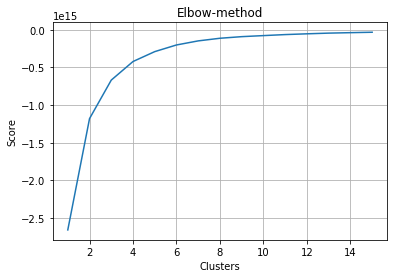

In [307]:
fig, ax = plt.subplots()
ax.plot([i+1 for i in range(k)],inertia)

ax.set(xlabel='Clusters', ylabel='Score',
       title='Elbow-method')
ax.grid()

The optimum number of clusters seems to be 4

In [308]:
dfFeClust = dfFe.dropna().copy()

In [309]:
len(dfFeClust)

16559

In [340]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(tokmean.values)
dfFeClust['Cluster'] = kmeans.labels_
kmeans.labels_

array([1, 0, 1, ..., 2, 1, 1], dtype=int32)

In [325]:
dfFeClust.head()

,Url,Price,Room,Surface,Bathroom,Floor,Cluster
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3,0
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2,1
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3,0
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2,1


In [333]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(dfFeClust.loc[(dfFeClust['Cluster'] == i)])
dimClusts

{0: 3750, 1: 11951, 2: 787, 3: 71}

In [365]:
import libclust
import importlib
importlib.reload(libclust)

<module 'libclust' from '/Users/fabiomontello/Google Drive/Università/LaSapienza/Corsi/AlgorithmsForDataMining/Homeworks/ADM Homework 4/libclust.py'>

In [366]:
X = tokmean.values
k = 4
selfCluster = {}
myclust = libclust.KMeans(X, k)
selfCluster = myclust.giveCluster()

[636621.0432, 47185.26458261766, 120372.76474489796, 270739.24045977014]


In [367]:
dimClusts = {}
for i in range(4):
    dimClusts[i] = len(selfCluster[i])
dimClusts

{0: 125, 1: 11644, 2: 3920, 3: 870}

In [369]:
np.array(myclust.giveClusterArray())

array([1, 2, 1, ..., 3, 1, 1])

In [370]:
dfFeClust['HMCluster'] = np.array(myclust.giveClusterArray())

In [372]:
dfFeClust.head()

,Url,Price,Room,Surface,Bathroom,Floor,Cluster,HMCluster
0,https://www.immobiliare.it/70323278-Vendita-Ap...,299000.0,6,114,2,1,1,1
1,https://www.immobiliare.it/70140452-Vendita-Ap...,850000.0,6,287,3,3,0,2
2,https://www.immobiliare.it/68203239-Vendita-At...,309000.0,6,110,1,2,1,1
3,https://www.immobiliare.it/70266408-Vendita-Ap...,930000.0,6,150,2,3,0,2
4,https://www.immobiliare.it/69582242-Vendita-Bi...,115000.0,2,50,1,2,1,1
